# Lab 9: Ordinary differential equations (2)

**Please enter your name and student number in the markdown cell below** then press `Shift` + `Enter`.

* Name:    **YOUR NAME HERE**
* SID:     **YOUR STUDENT NUMBER**

## Ordinary differential equations (2)

In this lab we'll continue to explore the use of `solve_ivp` to solve differential equations. In particular, we will look at *anharmonic* oscillators, which occur frequently throughout physics but have more complicated solutions than  familiar simple harmonic motion.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


## Anharmonic oscillator, version 1: asymmetric potential

First, consider the following potential:

$$\begin{align}
V(x) &= \tfrac12 k x^2(1 - \tfrac23 \alpha x) \\
F(x) &= -\frac{\mathrm dV}{\mathrm dx} = -kx(1 - \alpha x) \\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx(1 - \alpha x)
\end{align}$$

When $\alpha = 0$, this reduces to the familiar harmonic oscillator, but for $\alpha > 0$ this produces a weaker restoring force for positive $x$ than for negative $x$.

To get a sense of this, **plot $V(x)$ for $k = 1$ and $\alpha = \tfrac14$**.

<Figure size 432x288 with 0 Axes>

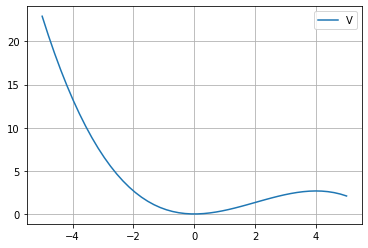

<Figure size 432x288 with 0 Axes>

In [2]:

k = 1
a = 1/4
m = 1

def V(x):
    return 0.5*k*x**2*(1-(2/3)*a*x)

def der(t, x):
    x0, x1 = x
    dx0 = x1
    dx1 = (-k*x0*(1-a*x0))/m
    return np.array((dx0, dx1))


xlist = np.linspace(-5,5,50)
plt.plot(xlist,V(xlist),label='V')
plt.legend()
plt.grid()
plt.figure()

For the same $k$ and $\alpha$ values as above, and setting $m = 1$ for simplicity, **solve this ODE** with initial conditions $x = -1.9$, $v = 0$, considering a large enough time range to see at least three complete oscillations. **Plot $x$ as a function of $t$.** What do you notice about the shape of this curve? Is it what you expect?

[[ 0.          0.        ]
 [ 0.          2.8025    ]
 [ 0.0028025   2.8025    ]
 ...
 [ 0.67242094 -0.79170118]
 [ 0.67162924 -0.79139418]
 [ 0.67083785 -0.79108731]]


<Figure size 432x288 with 0 Axes>

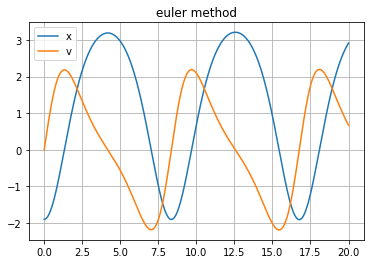

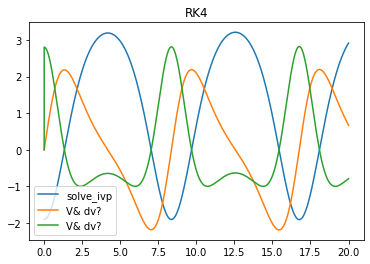

<Figure size 432x288 with 0 Axes>

In [3]:
t_total = 20
dt = 0.001
t = 0
x = np.array((-1.9, 0))
v = np.array((0, 0))

t_list = [t]
x_list = [x]
v_list = [v]

k = 1
a = 1/4
m = 1

def der(t, x):
    x0, x1 = x
    dx0 = x1
    dx1 = (-k*x0*(1-a*x0))/m
    return np.array((dx0, dx1))

for i in range(0,int(t_total/dt)):
    t = t + dt
    x = x + v*dt
    v = der(t,x)

    t_list.append(t)
    x_list.append(x)
    v_list.append(v)

x1_list = []
for i in x_list:
    x1_list.append(i[0])

def derR(t,x):
    return (-k*x*(1-a*x))/m

sol = solve_ivp(derR,[0,21],x1_list,t_eval=t_list)

t_list = np.array(t_list)
x_list = np.array(x_list)
v_list = np.array(v_list)

plt.plot(t_list,x_list[:,0],label='x')
plt.plot(t_list,v_list[:,0],label='v')
plt.title('euler method')
plt.grid()
plt.legend()
plt.figure()

print(v_list)

plt.plot(sol.t,sol.y[:,0], label='solve_ivp')
plt.plot(sol.t,v_list,label='V& dv?')
plt.title('RK4')
plt.legend()
plt.figure()

On the same axes, **plot the solution for the same initial conditions and value of $k$, but with $\alpha$ ranging from 0 to 0.3 in steps of 0.05.** How, qualitatively, does $\alpha$ affect the amplitude and period of oscillation?

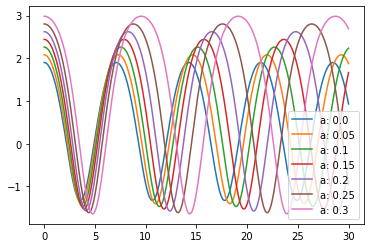

In [12]:
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

avals = linspace(0,0.3,7)

dt = 0.01
t_total = 30
t = 0
x = array((-1.9,0))

k = 1
m = 1

def SD(t,x):
    x0, x1 = x
    dx0 = x1
    dx1 = -(k * x0 * (1 - a * x0))/m
    return array((dx0, dx1))

sd_l = []
x_l = []

for a in avals:
    sd = SD(t,x)
    sd_l.append(sd)
    x_l.append(sd[1])

RK4_l = []
t_l = []

for n in x_l:
    n = array((n,0))
    sol = solve_ivp(SD,(0,30),n,max_step=0.1)
    RK4_l.append(sol.y[0])
    t_l.append(sol.t)

plt.figure()

for i in range(0,7):
    plt.plot(t_l[i],RK4_l[i],label=f'a: {round(avals[i],3)}')
plt.legend()


To make this more quantitative, devise a method to **find the first minimum of each of the curves** in that plot – that is, the period of oscillation. **Plot the period $\tau$ as a function of $\alpha$.**

*Hint:* use the `numpy.argmin` function to find the index of the minimum value of $x$, then look up this index in the $t$ array.

In [ ]:
?np.argmin

Signature: np.argmin(a, axis=None, out=None)
Docstring:
Returns the indices of the minimum values along an axis.

Parameters
----------
a : array_like
    Input array.
axis : int, optional
    By default, the index is into the flattened array, otherwise
    along the specified axis.
out : array, optional
    If provided, the result will be inserted into this array. It should
    be of the appropriate shape and dtype.

Returns
-------
index_array : ndarray of ints
    Array of indices into the array. It has the same shape as `a.shape`
    with the dimension along `axis` removed.

See Also
--------
ndarray.argmin, argmax
amin : The minimum value along a given axis.
unravel_index : Convert a flat index into an index tuple.

Notes
-----
In case of multiple occurrences of the minimum values, the indices
corresponding to the first occurrence are returned.

Examples
--------
>>> a = np.arange(6).reshape(2,3) + 10
>>> a
array([[10, 11, 12],
       [13, 14, 15]])
>>> np.argmin(a)
0
>>> np.argmi

In a similar way, setting $\alpha$ back to $\tfrac14$, **plot solutions on the same axes for initial $x$ values between $0$ and $-2$.** **Plot the period $\tau$ as a function of $x_0$** and hence show that, unlike the harmonic oscillator, this anharmonic oscillator is *not isochronous*, that is, the period $\tau$ depends on the amplitude of oscillation.

▶ **CHECKPOINT 1**

## Anharmonic oscillator, version 2: symmetrical potential

An alternative anharmonic potential has no harmonic (second-order) term at all; instead, the leading term is of even order $p \geq 4$.

$$\begin{align}
V(x) &= \frac kp x^p \\
F(x) &= -\frac{\mathrm dV}{\mathrm dx} = -kx^{p-1} \\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx^{p-1}
\end{align}$$

**Plot $V(x)$ for $p = 2, 4, 6$.**

<Figure size 864x504 with 0 Axes>

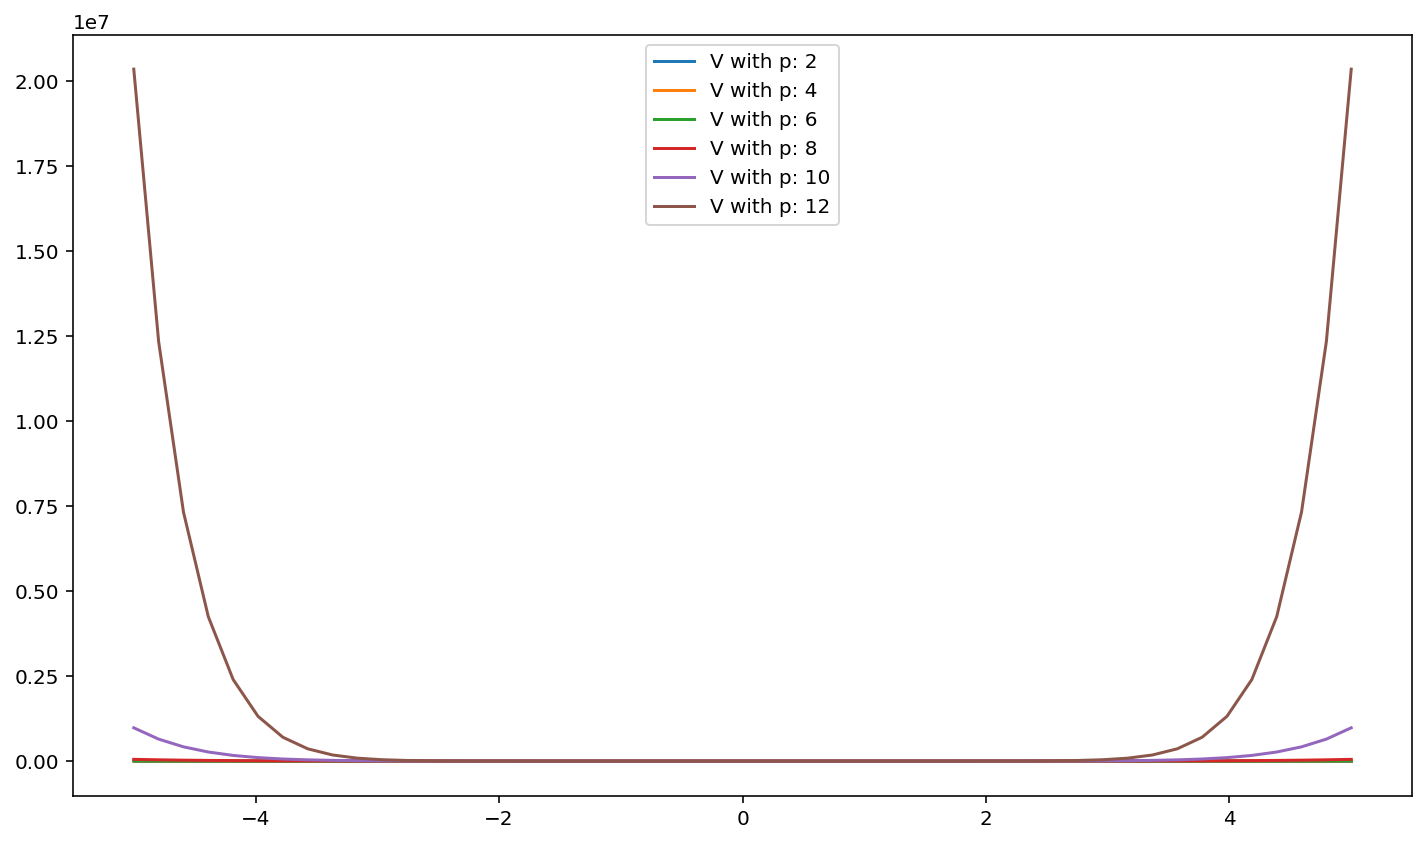

<Figure size 864x504 with 0 Axes>

In [ ]:
pvals = [2,4,6,8,10,12]
for p in pvals:
    k = 1
    a = 1/4
    m = 1

    def v(x):
        return (k/p)*x**p
    
    def der(t, x):
        x0, x1 = x
        dx0 = x1
        dx1 = -(k*x0**(p-1))/m
        return np.array((dx0, dx1))
        

    xlist = np.linspace(-5,5,50)
    plt.plot(xlist,v(xlist),label=f'V with p: {p}')
    plt.legend()
    plt.grid()
plt.figure()

**Solve this ODE** for the starting conditions $x = -1.5$, $v = 0$, with $k = 1$ and taking even values of $p$ from 2 to 12. **Plot your solutions**, showing $x$ as a function of time.

[-1.5  0. ]
[0. 0.]
[-1.5  0. ]
[0. 0.]
[-1.5  0. ]
[0. 0.]
[-1.5  0. ]
[0. 0.]
[-1.5  0. ]
[0. 0.]
[-1.5  0. ]
[0. 0.]
<ipython-input-10-6f07d7ec59fc>:23: RuntimeWarning: overflow encountered in double_scalars
  dx1 =  -(k*x0**(p-1))/m
<ipython-input-10-6f07d7ec59fc>:28: RuntimeWarning: invalid value encountered in add
  x = x + v*dt
<ipython-input-10-6f07d7ec59fc>:23: RuntimeWarning: overflow encountered in double_scalars
  dx1 =  -(k*x0**(p-1))/m
<ipython-input-10-6f07d7ec59fc>:28: RuntimeWarning: invalid value encountered in add
  x = x + v*dt
<ipython-input-10-6f07d7ec59fc>:23: RuntimeWarning: overflow encountered in double_scalars
  dx1 =  -(k*x0**(p-1))/m
<ipython-input-10-6f07d7ec59fc>:28: RuntimeWarning: invalid value encountered in add
  x = x + v*dt
<ipython-input-10-6f07d7ec59fc>:23: RuntimeWarning: overflow encountered in double_scalars
  dx1 =  -(k*x0**(p-1))/m
<ipython-input-10-6f07d7ec59fc>:28: RuntimeWarning: invalid value encountered in add
  x = x + v*dt


<Figure size 432x288 with 0 Axes>

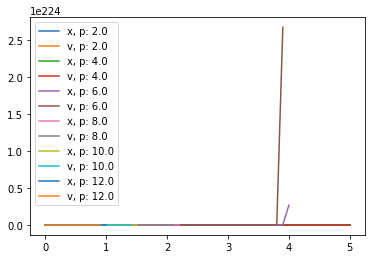

<Figure size 432x288 with 0 Axes>

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt



Now hold $p = 6$ constant and **plot the solution for a range of initial values of $x$**. Show that, again, an anharmonic oscillator is not isochronous.

<ipython-input-47-7e2c4f31917e>:21: RuntimeWarning: overflow encountered in double_scalars
  dx1 = -(k*x0**(p-1))/m
<ipython-input-47-7e2c4f31917e>:26: RuntimeWarning: invalid value encountered in add
  x = x + v*dt


<Figure size 864x504 with 0 Axes>

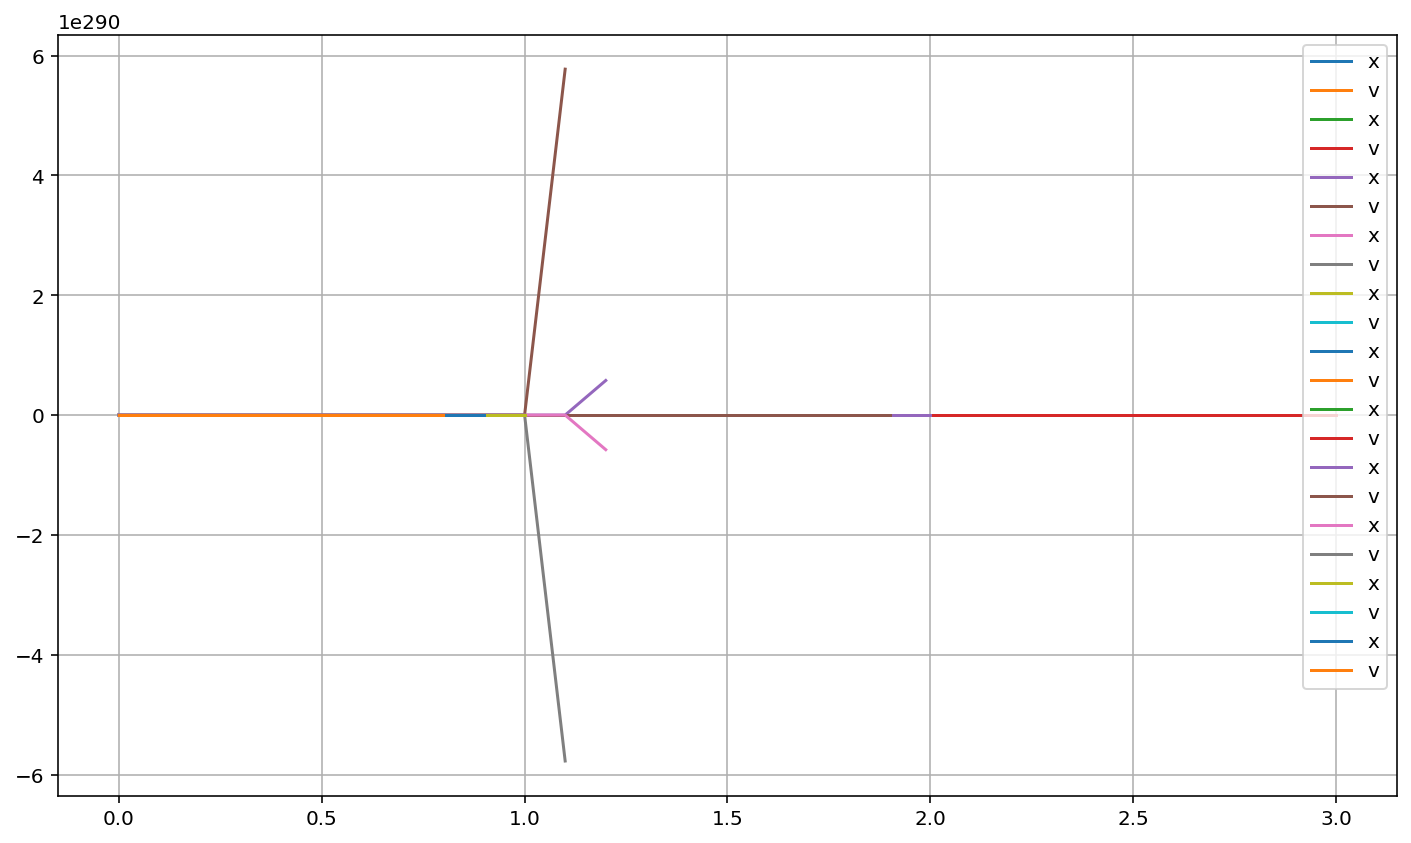

<Figure size 864x504 with 0 Axes>

In [ ]:
pvals = np.linspace(-5,5,11)

for xval in pvals:
    t_total = 3
    dt = 0.1
    t = 0
    x = np.array((xval, 0))
    v = der(t, x)

    t_list = [t]
    x_list = [x]
    v_list = [v]

    k = 1
    m = 1
    p = 6

    def der(t, x):
        x0, x1 = x
        dx0 = x1
        dx1 = -(k*x0**(p-1))/m
        return np.array((dx0, dx1))

    for i in range(0,int(t_total/dt)):
        t = t + dt
        x = x + v*dt
        v = der(t,x)

        t_list.append(t)
        x_list.append(x)
        v_list.append(v)

    t_list = np.array(t_list)
    x_list = np.array(x_list)
    v_list = np.array(v_list)

    plt.plot(t_list,x_list[:,0],label='x')
    plt.plot(t_list,v_list[:,0],label='v')
    plt.grid()
    plt.legend()
plt.figure()


▶ **CHECKPOINT 2**

##  Driven oscillations and resonance

We now consider the possibility that the force might depend on $t$ as well as $x$. Specifically, we consider the case of an oscillator "driven" (or "forced") at a particular angular frequency $\omega$:

$$\begin{align}
V(x) &= \frac kp x^p \\
F(t, x) &= -\frac{\mathrm dV}{\mathrm dx} + F(t) = -kx^{p-1} + A\sin(\omega t)\\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx^{p-1} + A\sin(\omega t)
\end{align}$$

To start with, **solve this new equation** for $k = 1$, $p = 2$, $A = 1$, and $\omega$ distributed between 0.1 and 10. As always, **plot your results.** What do you notice about the amplitude of the oscillations?

The phenomenon that you have observed is called *resonance*. Investigate it by **plotting the amplitude of oscillation against the frequency on a log-log plot**, for frequencies $\omega$ between about 0.01 and 30, and for $p = 2, 4, 6, 8, 10$ (as different curves on the same axes), keeping the other parameters the same. What do you notice about the strength and frequency of the resonance peak?

▶ **CHECKPOINT 3**

**Extension:** investigate the oscillation patterns of the nonlinear oscillators near their resonant frequencies (that is, at frequencies near the peak in the previous graph). Can you explain what is happening?